In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,  StandardScaler, LabelEncoder
import joblib

In [18]:
ruta_data = 'D:/Marlon Volveras - IA finan/Predictor de cartera banca Colombiana PYMES/Datos/cartera_banca_pymes.csv'

df= pd.read_csv(ruta_data)

df.head()

,(1) Saldo de la cartera a la fecha de corte del reporte,(2) Vigente,(3) Vencida 1-2 Meses,(4) Vencida 2-3 Meses,(5) Vencida 1-3 Meses,(6) Vencida 3-4 Meses,(7) Vencida > de 4 Meses,(8) Vencida 3-6 Meses,(9) Vencida +6 meses,(10) Vencida 1-4 meses,...,(21) Calificación de Riesgo C / Número de Clientes,(22) Calificación de Riesgo C / Saldo,(23) Calificación de Riesgo D / Número de Clientes,(24) Calificación de Riesgo D / Saldo,(25) Calificación de Riesgo E / Número de Clientes,(26) Calificación de Riesgo E / Saldo,año,mes,dia,banco_tipo_credito
0,4.043069e+12,3.726192e+12,4.077084e+10,2.598615e+10,0.000000e+00,1.798438e+10,2.321353e+11,0.000000e+00,0.0,0.0,...,15758,6.981148e+10,8911,3.627788e+10,71686,2.733936e+11,2015,1,31,Banagrario_MICRO MENOR TOTAL
1,3.908249e+11,3.665757e+11,0.000000e+00,0.000000e+00,5.670589e+09,0.000000e+00,0.000000e+00,5.159998e+09,0.0,0.0,...,168,8.784830e+09,501,2.025183e+10,111,4.103017e+09,2015,1,31,Banco De Occidente_MICROEMPRESA
2,8.462104e+07,8.462104e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,2015,1,31,Coofinep Cooperativa Financiera_EMPRESARIAL
3,2.075308e+09,2.075308e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0.000000e+00,0,0.000000e+00,0,0.000000e+00,2015,1,31,Cooperativa Financiera De Antioquia_EMPRESARIAL
4,2.293678e+10,2.293678e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,1,1.557166e+08,0,0.000000e+00,0,0.000000e+00,2015,1,31,Confiar Cooperativa Financiera_EMPRESARIAL


<Axes: >

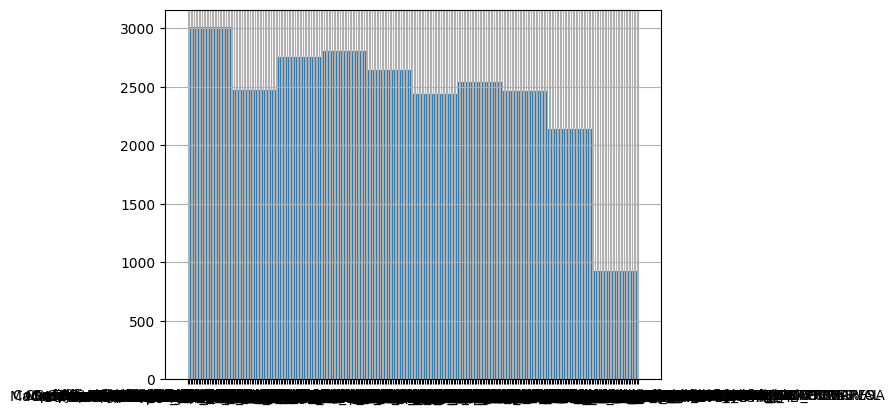

In [19]:
df['banco_tipo_credito'].hist()

#plt.xlabel('Valores')
#plt.ylabel('Frecuencia')
#plt.title('Histograma de la columna')
#plt.xticks(rotation=90)
#plt.show()

In [20]:
#codificar variable categorica 
colum_in = df['banco_tipo_credito']
encoder_cat = LabelEncoder()

encoder_cat.fit(colum_in)

mapeo_categorias = dict(zip(encoder_cat.classes_, encoder_cat.transform(encoder_cat.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran = encoder_cat.transform(colum_in)

df['banco_tipo_credito_num'] = colum_tran


# Guarda el scaler en un archivo
joblib.dump(encoder_cat, 'standard_scaler.pkl')

mapeo_categorias

{'"Bancien S.A." Y/O "Ban100"_CORPORATIVO': 0,
 '"Bancien S.A." Y/O "Ban100"_EMPRESARIAL': 1,
 '"Bancien S.A." Y/O "Ban100"_MICRO MAYOR TOTAL': 2,
 '"Bancien S.A." Y/O "Ban100"_MICRO MENOR TOTAL': 3,
 '"Bancien S.A." Y/O "Ban100"_MICROEMPRESA': 4,
 '"Bancien S.A." Y/O "Ban100"_PYMES': 5,
 '"Banco Colpatria", "Scotiabank"_CORPORATIVO': 6,
 '"Banco Colpatria", "Scotiabank"_CRÉDITO ROTATIVO TOTAL': 7,
 '"Banco Colpatria", "Scotiabank"_EMPRESARIAL': 8,
 '"Banco Colpatria", "Scotiabank"_MICRO MAYOR TOTAL': 9,
 '"Banco Colpatria", "Scotiabank"_MICRO MENOR TOTAL': 10,
 '"Banco Colpatria", "Scotiabank"_MICROEMPRESA': 11,
 '"Banco Colpatria", "Scotiabank"_PYMES': 12,
 'Arco Grupo Bancoldex_CORPORATIVO': 13,
 'Arco Grupo Bancoldex_EMPRESARIAL': 14,
 'Arco Grupo Bancoldex_FACTORING': 15,
 'Arco Grupo Bancoldex_MICROEMPRESA': 16,
 'Arco Grupo Bancoldex_PYMES': 17,
 'Av Villas_CORPORATIVO': 18,
 'Av Villas_CRÉDITO ROTATIVO TOTAL': 19,
 'Av Villas_EMPRESARIAL': 20,
 'Av Villas_FACTORING': 21,
 'Av V

In [21]:
df.head()

,(1) Saldo de la cartera a la fecha de corte del reporte,(2) Vigente,(3) Vencida 1-2 Meses,(4) Vencida 2-3 Meses,(5) Vencida 1-3 Meses,(6) Vencida 3-4 Meses,(7) Vencida > de 4 Meses,(8) Vencida 3-6 Meses,(9) Vencida +6 meses,(10) Vencida 1-4 meses,...,(22) Calificación de Riesgo C / Saldo,(23) Calificación de Riesgo D / Número de Clientes,(24) Calificación de Riesgo D / Saldo,(25) Calificación de Riesgo E / Número de Clientes,(26) Calificación de Riesgo E / Saldo,año,mes,dia,banco_tipo_credito,banco_tipo_credito_num
0,4.043069e+12,3.726192e+12,4.077084e+10,2.598615e+10,0.000000e+00,1.798438e+10,2.321353e+11,0.000000e+00,0.0,0.0,...,6.981148e+10,8911,3.627788e+10,71686,2.733936e+11,2015,1,31,Banagrario_MICRO MENOR TOTAL,31
1,3.908249e+11,3.665757e+11,0.000000e+00,0.000000e+00,5.670589e+09,0.000000e+00,0.000000e+00,5.159998e+09,0.0,0.0,...,8.784830e+09,501,2.025183e+10,111,4.103017e+09,2015,1,31,Banco De Occidente_MICROEMPRESA,69
2,8.462104e+07,8.462104e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.000000e+00,0,0.000000e+00,0,0.000000e+00,2015,1,31,Coofinep Cooperativa Financiera_EMPRESARIAL,162
3,2.075308e+09,2.075308e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.000000e+00,0,0.000000e+00,0,0.000000e+00,2015,1,31,Cooperativa Financiera De Antioquia_EMPRESARIAL,175
4,2.293678e+10,2.293678e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,1.557166e+08,0,0.000000e+00,0,0.000000e+00,2015,1,31,Confiar Cooperativa Financiera_EMPRESARIAL,155


In [24]:
df_final = df.drop('banco_tipo_credito', axis=1)

ruta_out_data = 'D:/Marlon Volveras - IA finan/Predictor de cartera banca Colombiana PYMES/Datos/cartera_banca_pymes_final.csv'

df_final.to_csv(ruta_out_data, index=False)